# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sohanjs111/Machine-Learning/main/Database/Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

### Initialize the variables
* N = the number of users {$n$}
* d = the number of ads 
* ads_selected = full list of ads selected over the round (initial empty)
* numbers_of_rewards_1 = numbers of times each ad gets the reward 1. (initial it with 'd' zeros) {$N^1_i (n)$}
* numbers_of_rewards_0 = numbers of times each ad gets the reward 0. (initial it with 'd' zeros) {$N^0_i (n)$}
* total_rewards = Total reward accumulated over the rounds (initialize is as 0)


In [3]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

### Creating the for loop 

In [4]:
import random

for n in range(0, N):                               #                for loop for N (users)
  ad = 0                                            #                start from ad zero
  max_random = 0                                    #                Highest of the random draws
  for i in range(0, d):                             #                for loop for d (ads)
    #                             (Step 2)
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    #                             (Step 3)
    if (random_beta > max_random):
      max_random = random_beta                      #                update highest random draws
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

In [5]:
print(numbers_of_rewards_1)
print(numbers_of_rewards_0)
print("Total rewards =",total_reward)

[7, 19, 1, 15, 2401, 1, 1, 147, 1, 0]
[59, 108, 32, 89, 6505, 31, 30, 499, 31, 23]
Total rewards = 2593


In [6]:
numbers_of_rewards_1.index(max(numbers_of_rewards_1))+1

5

In [7]:
numbers_of_rewards_0.index(max(numbers_of_rewards_0))+1

5

## Visualising the results - Histogram

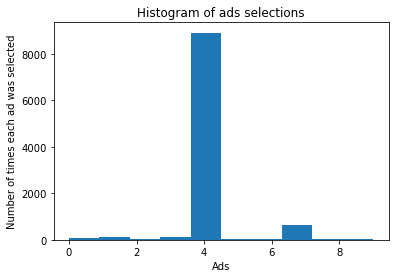

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()